<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"  style="height:65%" align="right">


# Lista 2 - NN & Backpropagation
**Nome:** Andre Barbosa

**Numero Usp:** 7971751


_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__
tf.random.set_seed(42)
pd.set_option("display.max_columns", 25)

In [2]:
#Necessario para plotar as learning curves e detectar overfit
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simpes possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo perceptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [3]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [4]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)

100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [5]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 1261.1035
Epoch 2/300
4/4 [==============================] - 0s 702us/step - loss: 3.0959
Epoch 3/300
4/4 [==============================] - 0s 726us/step - loss: 3.0629
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 2.8458
Epoch 5/300
4/4 [==============================] - 0s 834us/step - loss: 2.7476
Epoch 6/300
4/4 [==============================] - 0s 772us/step - loss: 2.6635
Epoch 7/300
4/4 [==============================] - 0s 911us/step - loss: 2.5852
Epoch 8/300
4/4 [==============================] - 0s 939us/step - loss: 2.4718
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 2.3527
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 2.4135
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 2.1621
Epoch 12/300
4/4 [==============================] - 0s 927us/step - loss: 2.1028
Epoch 13/300
4/4 [==========================

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
print("prediction: "+ str(model.predict([17]))+"      real value: " + str(f1(17)))

prediction: [[175.01373]]      real value: 175


In [8]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

2/2 [==============================] - 0s 915us/step - loss: 2.0665e-05


2.066517117782496e-05

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE). 

## Aprendendo uma função não linear

In [9]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [10]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

In [11]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    #Seu código aqui
    keras.layers.Dense(units=2, activation="tanh"),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=550)

Epoch 1/550
4/4 [==============================] - 0s 815us/step - loss: 0.0937
Epoch 2/550
4/4 [==============================] - 0s 780us/step - loss: 0.0863
Epoch 3/550
4/4 [==============================] - 0s 793us/step - loss: 0.0792
Epoch 4/550
4/4 [==============================] - 0s 737us/step - loss: 0.0732
Epoch 5/550
4/4 [==============================] - 0s 754us/step - loss: 0.0673
Epoch 6/550
4/4 [==============================] - 0s 729us/step - loss: 0.0623
Epoch 7/550
4/4 [==============================] - 0s 742us/step - loss: 0.0580
Epoch 8/550
4/4 [==============================] - 0s 718us/step - loss: 0.0540
Epoch 9/550
4/4 [==============================] - 0s 737us/step - loss: 0.0512
Epoch 10/550
4/4 [==============================] - 0s 743us/step - loss: 0.0488
Epoch 11/550
4/4 [==============================] - 0s 712us/step - loss: 0.0464
Epoch 12/550
4/4 [==============================] - 0s 731us/step - loss: 0.0446
Epoch 13/550
4/4 [===================

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [13]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [14]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 877us/step - loss: 0.0020


0.0019727263133972883

In [15]:
REF_UNIT = 7
print(f"prediction: {str(model.predict([REF_UNIT]))}\n real value: {str(f2(REF_UNIT))}")

prediction: [[0.39060307]]
 real value: 0.37


## Resposta:

A saída não deve ter uma função de ativação porquê, em redes neurais, funções de ativação servem para mapear uma função com Domínio $\infty$ para um intervalo definido. Por exemplo, a função de ativação _sigmoid_ mapeia uma função no domínio ${\rm I\!R}$ cuja imagem partence ao intervalo $[0,1]$. No caso, como queremos um resultado de uma fução cuja imagem em ${\rm I\!R}$, a função de ativação não é necessária.

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbolica




**<font color='red'> Sua resposta aqui </font>**

A velocidade de convergência da rede muda **muito**. Por exemplo, considere o caso da função de ativação `sigmoid`, `tanh` e `relu`, respectivamente e com 1000 épocas. O resultado está resumido na tabela na seção `Resultados`

In [16]:
x_val.shape

(63,)

In [17]:
x_val.shape

(63,)

In [18]:
def evaluate_model_activation_function(x, y, activation_func, verbose=0):
    model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    #Seu código aqui
    keras.layers.Dense(units=2, activation=activation_func),
    keras.layers.Dense(units=1),
    ])

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.fit(x,y,epochs=1000, verbose=verbose)
    return model.evaluate(x=x,y=y, verbose=0)

In [19]:
from typing import Callable
def evaluate_results(evaluate_callable: Callable, string_args: str, verbose=0) -> float:
    results = np.empty((0,1), float)
    for _ in range(10):
        results = np.vstack((results, evaluate_callable(x_val, y_val, string_args, verbose=verbose)))
    return results

In [20]:
results_sigmoid = evaluate_results(evaluate_model_activation_function, "sigmoid", verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 929us/step - loss: 0.2705
Epoch 2/1000
2/2 [==============================] - 0s 842us/step - loss: 0.2660
Epoch 3/1000
2/2 [==============================] - 0s 910us/step - loss: 0.2615
Epoch 4/1000
2/2 [==============================] - 0s 855us/step - loss: 0.2570
Epoch 5/1000
2/2 [==============================] - 0s 713us/step - loss: 0.2525
Epoch 6/1000
2/2 [==============================] - 0s 765us/step - loss: 0.2482
Epoch 7/1000
2/2 [==============================] - 0s 798us/step - loss: 0.2439
Epoch 8/1000
2/2 [==============================] - 0s 738us/step - loss: 0.2396
Epoch 9/1000
2/2 [==============================] - 0s 847us/step - loss: 0.2353
Epoch 10/1000
2/2 [==============================] - 0s 719us/step - loss: 0.2309
Epoch 11/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2269
Epoch 12/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2228
Epoch 13/1000
2/2 [==========

In [21]:
%timeit evaluate_model_activation_function(x_val, y_val, "sigmoid", verbose=0)

1.8 s ± 71.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
results_sigmoid.mean(), results_sigmoid.std()

(0.0037285717087797822, 0.0034030545722465457)

In [23]:
results_relu = evaluate_results(evaluate_model_activation_function, "relu", verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 868us/step - loss: 47.5010
Epoch 2/1000
2/2 [==============================] - 0s 924us/step - loss: 47.0974
Epoch 3/1000
2/2 [==============================] - 0s 889us/step - loss: 46.6875
Epoch 4/1000
2/2 [==============================] - 0s 761us/step - loss: 46.2946
Epoch 5/1000
2/2 [==============================] - 0s 728us/step - loss: 45.9132
Epoch 6/1000
2/2 [==============================] - 0s 716us/step - loss: 45.4974
Epoch 7/1000
2/2 [==============================] - 0s 721us/step - loss: 45.1063
Epoch 8/1000
2/2 [==============================] - 0s 862us/step - loss: 44.7310
Epoch 9/1000
2/2 [==============================] - 0s 857us/step - loss: 44.3474
Epoch 10/1000
2/2 [==============================] - 0s 840us/step - loss: 43.9996
Epoch 11/1000
2/2 [==============================] - 0s 674us/step - loss: 43.5863
Epoch 12/1000
2/2 [==============================] - 0s 852us/step - loss: 43.2068
Epoch 13/1000

In [24]:
%timeit evaluate_model_activation_function(x_val, y_val, "relu", verbose=0)

1.73 s ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
results_relu.mean(), results_relu.std()

(0.03912877750699408, 0.05519716170757584)

In [26]:
results_tanh = evaluate_results(evaluate_model_activation_function, "tanh", verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 895us/step - loss: 0.4486
Epoch 2/1000
2/2 [==============================] - 0s 837us/step - loss: 0.4413
Epoch 3/1000
2/2 [==============================] - 0s 733us/step - loss: 0.4339
Epoch 4/1000
2/2 [==============================] - 0s 734us/step - loss: 0.4267
Epoch 5/1000
2/2 [==============================] - 0s 882us/step - loss: 0.4197
Epoch 6/1000
2/2 [==============================] - 0s 746us/step - loss: 0.4124
Epoch 7/1000
2/2 [==============================] - 0s 760us/step - loss: 0.4054
Epoch 8/1000
2/2 [==============================] - 0s 839us/step - loss: 0.3987
Epoch 9/1000
2/2 [==============================] - 0s 785us/step - loss: 0.3918
Epoch 10/1000
2/2 [==============================] - 0s 700us/step - loss: 0.3854
Epoch 11/1000
2/2 [==============================] - 0s 775us/step - loss: 0.3785
Epoch 12/1000
2/2 [==============================] - 0s 731us/step - loss: 0.3719
Epoch 13/1000
2/2 [======

In [27]:
%timeit evaluate_model_activation_function(x_val, y_val, "tanh", verbose=0)

1.97 s ± 199 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
results_tanh.mean(), results_tanh.std()

(0.0025818293041083963, 0.0015905165071786866)

## Resultados

| Função de Ativação | Tempo  | Loss média (10 rounds) | Std médio (10 rounds) |
|--------------------|---------------------|------------------------|-----------------------|
| sigmoid            | 2 s ± 337 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)    | 0.0037285717087797822   | 0.0034030545722465457  |
| tanh               | 1.99 s ± 211 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)     | 0.0025818293041083963   | 0.0015905165071786866  |
| relu               | 1.84 s ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)    | 0.03912877750699408    | 0.05519716170757584   |

Fica claro que apesar da função de ativação `relu` é a que roda mais rápido dentre todas, ela teve uma loss mais alta do que as demais (na ordem de 10 vezes). Em contrapartida, apesar da tangente hiperbólica e a sigmoid tiveram resultados semelhantes e ambas levaram tempo para rodar.


O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop



**<font color='red'> Sua resposta aqui </font>**

In [29]:
def evaluate_model_optimization_method(x, y, optimization, verbose=0):
    model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    #Seu código aqui
    keras.layers.Dense(units=2, activation="tanh"),
    keras.layers.Dense(units=1),
    ])

    model.compile(optimizer=optimization, loss="mean_squared_error")
    model.fit(x,y,epochs=1000, verbose=verbose)
    return model.evaluate(x=x,y=y, verbose=0)

In [30]:
results_adam = evaluate_results(evaluate_model_optimization_method, "adam", verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 867us/step - loss: 0.1322
Epoch 2/1000
2/2 [==============================] - 0s 967us/step - loss: 0.1284
Epoch 3/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1251
Epoch 4/1000
2/2 [==============================] - 0s 891us/step - loss: 0.1215
Epoch 5/1000
2/2 [==============================] - 0s 768us/step - loss: 0.1180
Epoch 6/1000
2/2 [==============================] - 0s 970us/step - loss: 0.1147
Epoch 7/1000
2/2 [==============================] - 0s 774us/step - loss: 0.1118
Epoch 8/1000
2/2 [==============================] - 0s 754us/step - loss: 0.1085
Epoch 9/1000
2/2 [==============================] - 0s 747us/step - loss: 0.1056
Epoch 10/1000
2/2 [==============================] - 0s 728us/step - loss: 0.1024
Epoch 11/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1001
Epoch 12/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0975
Epoch 13/1000
2/2 [============

In [31]:
%timeit evaluate_model_optimization_method(x_val, y_val, "adam", verbose=0)

1.87 s ± 92.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
results_adam.mean(), results_adam.std()

(0.001741821866016835, 0.0011127221000065788)

In [33]:
results_rmsprop = evaluate_results(evaluate_model_optimization_method, "rmsprop", verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.1956
Epoch 2/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.1655
Epoch 3/1000
2/2 [==============================] - 0s 940us/step - loss: 1.1446
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.1269
Epoch 5/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.1112
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.0965
Epoch 7/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.0828
Epoch 8/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.0697
Epoch 9/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.0570
Epoch 10/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.0447
Epoch 11/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.0327
Epoch 12/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.0209
Epoch 13/1000
2/2 [============================

In [34]:
%timeit evaluate_model_optimization_method(x_val, y_val, "rmsprop", verbose=0)

1.93 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
results_rmsprop.mean(), results_rmsprop.std()

(0.0007170679258706514, 0.0006996736208197308)

In [36]:
results_sdg = evaluate_results(evaluate_model_optimization_method, "sgd", verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 919us/step - loss: 0.9639
Epoch 2/1000
2/2 [==============================] - 0s 785us/step - loss: 0.0632
Epoch 3/1000
2/2 [==============================] - 0s 951us/step - loss: 0.0366
Epoch 4/1000
2/2 [==============================] - 0s 909us/step - loss: 0.0266
Epoch 5/1000
2/2 [==============================] - 0s 841us/step - loss: 0.0219
Epoch 6/1000
2/2 [==============================] - 0s 804us/step - loss: 0.0193
Epoch 7/1000
2/2 [==============================] - 0s 728us/step - loss: 0.0179
Epoch 8/1000
2/2 [==============================] - 0s 800us/step - loss: 0.0169
Epoch 9/1000
2/2 [==============================] - 0s 726us/step - loss: 0.0163
Epoch 10/1000
2/2 [==============================] - 0s 871us/step - loss: 0.0159
Epoch 11/1000
2/2 [==============================] - 0s 713us/step - loss: 0.0156
Epoch 12/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 13/1000
2/2 [========

In [37]:
%timeit evaluate_model_optimization_method(x_val, y_val, "sgd", verbose=0)

1.62 s ± 6.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
results_sdg.mean(), results_sdg.std()

(0.00986968686338514, 0.009453639871701627)

## Resultados

| Otimização      | Tempo  | Loss média (10 rounds) | Std médio (10 rounds) |
|--------------------|---------------------|------------------------|-----------------------|
| adam            | 2.01 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) | 0.001741821866016835   | 0.0011127221000065788  |
| rmsprop         | 1.93 s ± 50.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)    | 0.0007170679258706514   | 0.0006996736208197308  |
| sgd             | 1.82 s ± 76.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)     | 0.00986968686338514    | 0.009453639871701627   |

É possível ver que apesar do `SGD` rodar um pouco mais rápido, o desempenho dele é quase 10 vezes pior que os demais. Em contrapartida, o `RMSprop` teve um resultado, em termos de _loss_ muito superior aos demais.

Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?



In [39]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)
model.evaluate(x=val, y=f1(val))

Epoch 1/300
4/4 [==============================] - 0s 885us/step - loss: 3528.8997
Epoch 2/300
4/4 [==============================] - 0s 797us/step - loss: 3525.6929
Epoch 3/300
4/4 [==============================] - 0s 733us/step - loss: 3522.6108
Epoch 4/300
4/4 [==============================] - 0s 636us/step - loss: 3519.3953
Epoch 5/300
4/4 [==============================] - 0s 701us/step - loss: 3516.3516
Epoch 6/300
4/4 [==============================] - 0s 733us/step - loss: 3513.3247
Epoch 7/300
4/4 [==============================] - 0s 665us/step - loss: 3510.2158
Epoch 8/300
4/4 [==============================] - 0s 743us/step - loss: 3507.1748
Epoch 9/300
4/4 [==============================] - 0s 685us/step - loss: 3504.0120
Epoch 10/300
4/4 [==============================] - 0s 686us/step - loss: 3500.8545
Epoch 11/300
4/4 [==============================] - 0s 743us/step - loss: 3497.8892
Epoch 12/300
4/4 [==============================] - 0s 1ms/step - loss: 3494.8596
Epo

2701.00244140625

_O modelo não converge e, logo, **não aprende nada**._

A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

In [40]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    #Seu código aqui
    keras.layers.Dense(units=2, activation="tanh"),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 761us/step - loss: 1.2499
Epoch 2/400
4/4 [==============================] - 0s 723us/step - loss: 1.1884
Epoch 3/400
4/4 [==============================] - 0s 715us/step - loss: 1.1261
Epoch 4/400
4/4 [==============================] - 0s 753us/step - loss: 1.0648
Epoch 5/400
4/4 [==============================] - 0s 737us/step - loss: 1.0042
Epoch 6/400
4/4 [==============================] - 0s 773us/step - loss: 0.9452
Epoch 7/400
4/4 [==============================] - 0s 766us/step - loss: 0.8867
Epoch 8/400
4/4 [==============================] - 0s 828us/step - loss: 0.8289
Epoch 9/400
4/4 [==============================] - 0s 705us/step - loss: 0.7730
Epoch 10/400
4/4 [==============================] - 0s 693us/step - loss: 0.7187
Epoch 11/400
4/4 [==============================] - 0s 1ms/step - loss: 0.6663
Epoch 12/400
4/4 [==============================] - 0s 800us/step - loss: 0.6150
Epoch 13/400
4/4 [=====================

In [41]:
np.sqrt(model.evaluate(x=x_val,y=y_val))

2/2 [==============================] - 0s 1ms/step - loss: 0.0041


0.06439498605587787

In [42]:
x_val2 = np.linspace(20,50,63)
y_val2 = f2(x_val2)

In [43]:
np.sqrt(model.evaluate(x=x_val2,y=y_val2))

2/2 [==============================] - 0s 755us/step - loss: 41.8527


6.469369167604969

O desempenho da loss (erro quadrático médio) é **muito** pior para pontos fora do intervalo. Enquanto podemos dizer que dentro do intervalo, o `RMSE` é praticamente 0 condisderando as unidades da função da entrada, com o intervalo $[20, 50]$, o erro já é de $\sqrt{41.8527}\approx6.47$ unidades, o que é alto.

# Prevendo se vai chover na Austrália

## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisara escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

In [44]:
def visualize_data(data):
    """Gera graficos das distribuicoes das features e salva em disco"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly
    plt.figure(figsize=(8, 6))

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.savefig('data_RainToday.png')
    plt.clf()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.savefig('data_Rainomorrow.png')
    plt.clf()

    # Humidity3pm:
    sns.set()
    sns.distplot(data.Humidity3pm, color=ibm_pltt[0])
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.savefig('data_Humidity3pm.png')
    plt.clf()

    # Pressure9am:
    sns.set()
    sns.distplot(data.Pressure9am, color=ibm_pltt[4])
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.savefig('data_Pressure9am.png')
    plt.clf()

    # Rainfall:
    sns.set()
    sns.distplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.savefig('data_Rainfall.png')
    plt.clf()

    return


# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

In [45]:
from sklearn.model_selection import train_test_split
def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    #Seu código aqui
    raw_data = pd.read_csv(data_path)
    return raw_data

def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    #Seu código aqui
    # Decidi remover essas daqui por motivos de muitos nulos
    del_col = ['Sunshine', 'Evaporation', 'Cloud3pm', 
               'Cloud9am','Date']
    cat_col = ['Location', 
               'WindGustDir',
               'WindDir9am',
               'WindDir3pm'
              ]
    raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%Y-%m-%d')
    raw_data['year'] = pd.DatetimeIndex(raw_data['Date']).year
    raw_data['month'] = pd.DatetimeIndex(raw_data['Date']).month
    raw_data['day'] = pd.DatetimeIndex(raw_data['Date']).day
    target_data = 'RainTomorrow'
    map_bools = {'Yes': 1, 'No':0}
    processed_data = raw_data.drop(columns=del_col)
    processed_data[target_data] = processed_data[target_data].map(map_bools)
    processed_data['RainToday'] = processed_data['RainToday'].map(map_bools)
    processed_data = processed_data.fillna(processed_data.median())
    processed_data = pd.get_dummies(processed_data, columns=cat_col)
    # Inspirado daqui
    # http://blog.davidkaleko.com/feature-engineering-cyclical-features.html
    processed_data['month_sin'] = np.sin(processed_data.month*(2.*np.pi/12))
    processed_data['month_cos'] = np.cos(processed_data.month*(2.*np.pi/12))
    processed_data['day_sin'] = np.sin(processed_data.day*(2.*np.pi/30))
    processed_data['day_cos'] = np.cos(processed_data.day*(2.*np.pi/30))
    processed_data = processed_data.drop(columns=['month', 'day'])
    return processed_data


def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    #Seu código aqui
    target_data = 'RainTomorrow'
    x_train, x_val, y_train, y_val = train_test_split(data.drop(columns=[target_data]),
                                                      data[target_data],
                                                      test_size=val_size)
   
    return x_train, x_val, y_train, y_val


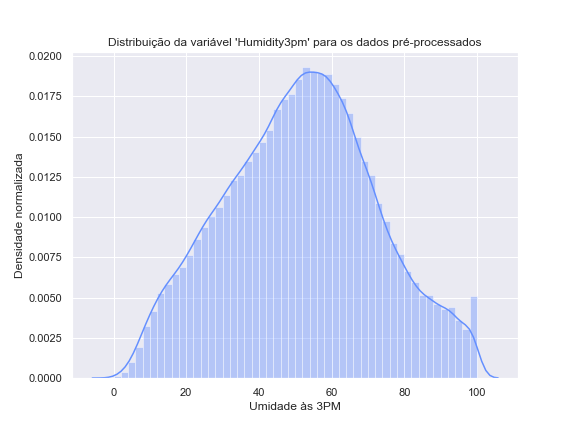

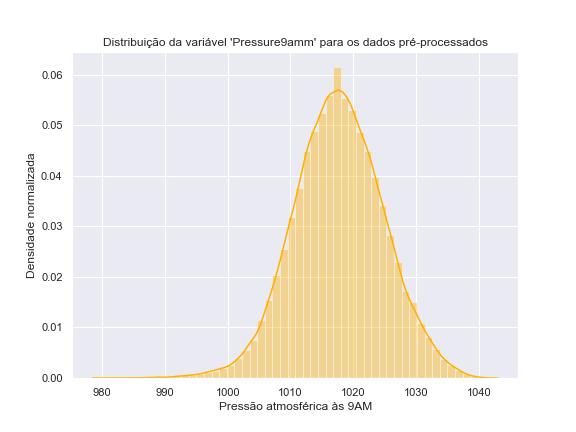

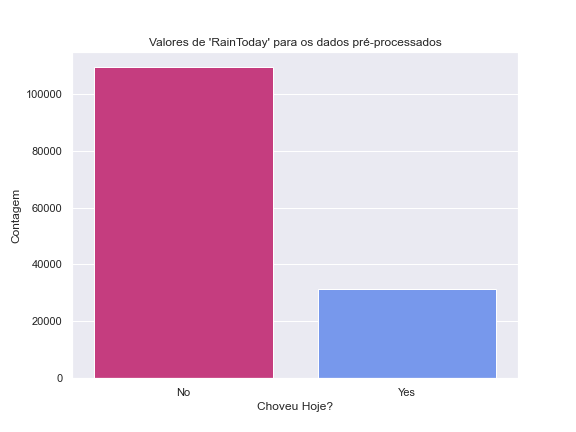

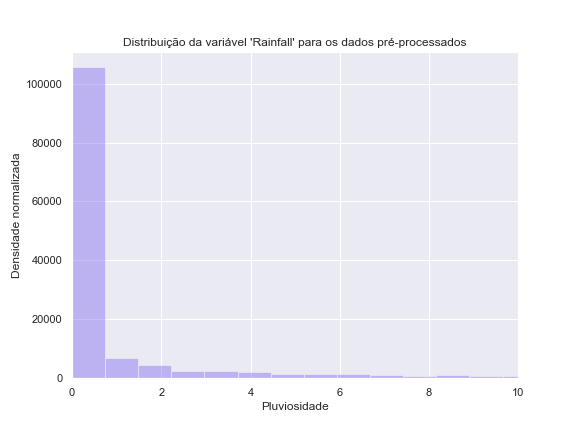

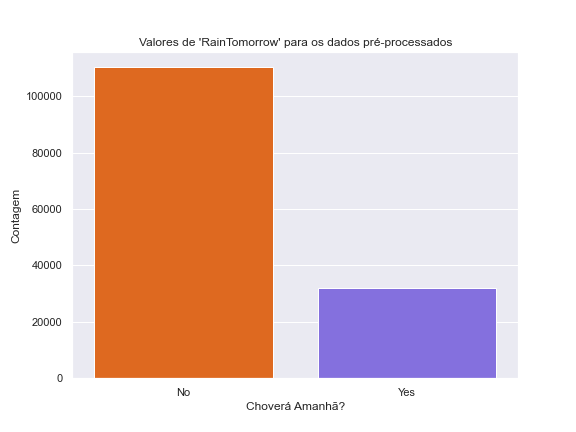

<Figure size 576x432 with 0 Axes>

In [46]:
from IPython.display import Image
df = load_data()
visualize_data(df)
imgs_files = !ls *.png
for img_file in imgs_files:
    display(Image(filename=img_file))

In [47]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       NaN     16.9     21.8        No      0.0           No  
1       NaN     17.2     24.3        No      0.0           No  
2       2.0     21.0     23.2        No      0.0           No  
3       NaN     18.1     26.5        No      1.0           No  
4       8.0     17.8     29.7        No      0.2           No

In [48]:
df.shape

(142193, 24)

In [49]:
df.isna().sum().sort_values(ascending=False)/len(df)

Sunshine         0.476929
Evaporation      0.427890
Cloud3pm         0.401525
Cloud9am         0.377353
Pressure9am      0.098556
Pressure3pm      0.098324
WindDir9am       0.070418
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir3pm       0.026570
Humidity3pm      0.025388
Temp3pm          0.019171
WindSpeed3pm     0.018496
Humidity9am      0.012476
RainToday        0.009888
Rainfall         0.009888
WindSpeed9am     0.009480
Temp9am          0.006358
MinTemp          0.004480
MaxTemp          0.002265
Location         0.000000
RainTomorrow     0.000000
RISK_MM          0.000000
Date             0.000000
dtype: float64

In [50]:
preprocessed = pre_processing(df)
x_train, x_val, y_train, y_val = split_data(preprocessed)

# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


In [51]:
# Seu código aqui
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report,
                             roc_auc_score,
                             roc_curve, auc)
standard_features = StandardScaler()
x_train = standard_features.fit_transform(x_train)
x_val = standard_features.transform(x_val)

In [52]:
x_train.shape

(113754, 116)

In [53]:
model = tf.keras.Sequential([    
    keras.Input(name='input_shape', shape=(x_train.shape[1],)),
    #Seu código aqui
    keras.layers.Dense(units=80, activation="tanh", name='fc1'),
    keras.layers.Dense(units=1, activation="sigmoid"),
])

In [54]:
model.summary()

Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 80)                9360      
_________________________________________________________________
dense_222 (Dense)            (None, 1)                 81        
Total params: 9,441
Trainable params: 9,441
Non-trainable params: 0
_________________________________________________________________


In [55]:
case_false = y_train.value_counts()[0]
case_true = y_train.value_counts()[1]
to_balance = case_false/case_true
class_weight = {0:1, 1:to_balance}
class_weight

{0: 1, 1: 3.441260297505173}

Estou basicamente falando para o modelo considerar a mesma importância para a classe 0 e dar um peso 3 vezes maior para a classe 1, uma vez que ela acontece uase três vezes menos no dataset. Isso serve para lidarmos com desbalanceamento.

In [56]:
def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.TensorBoard(f'./{name}'),
    ]

In [57]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy")
model_history = model.fit(x_train,y_train,epochs=100, validation_split=.1,
          class_weight=class_weight,
          batch_size=5012,
          callbacks=get_callbacks('validation'),
          shuffle=True)

Epoch 1/100
 1/21 [>.............................] - ETA: 0s - loss: 1.2088WARNING:tensorflow:From /Users/abarbosa/miniconda3/envs/nlportugues/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
19/21 [==========================>...] - ETA: 0s - loss: 0.9212WARNING:tensorflow:5 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x1506059d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary r

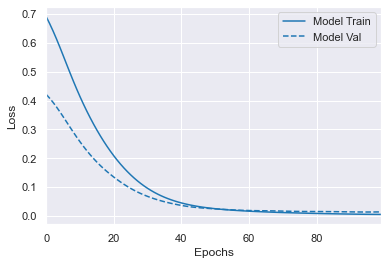

In [58]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)
plotter.plot({'model': model_history})

In [59]:
#fonte: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, tresholds = roc_curve(labels, predictions)
    plt.figure(figsize=(10,6))
    plt.plot(100*fp, 100*tp, label=name, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.title(name)
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    return fp, tp, tresholds

In [60]:
test_predictions = model.predict(x_val)

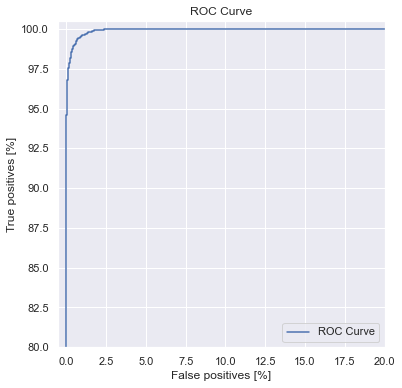

In [61]:
fp, tp, tresholds = plot_roc("ROC Curve", y_val, test_predictions)
_ = plt.legend(loc='lower right')

In [62]:
fp[200], tp[200], tresholds[200]

(0.002886133032694476, 0.9832375478927203, 0.7876622)

In [63]:
result = tf.math.confusion_matrix(
    y_val, test_predictions>tresholds[200],
    num_classes=2, weights=None, dtype=tf.dtypes.int32,
).numpy()

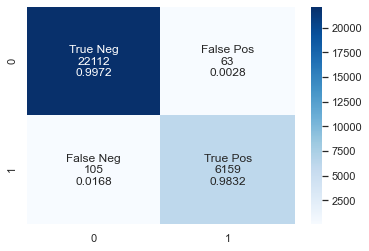

In [64]:
#retirado daqui:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                result.flatten()]
group_percentages = np.array([value/value.sum() for value in result]).flatten()
labels = [f'{v1}\n{v2}\n{v3:.4f}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
_ = sns.heatmap(result, annot=labels, fmt='', cmap='Blues')

In [65]:
print(classification_report(y_val, test_predictions>tresholds[200]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22175
           1       0.99      0.98      0.99      6264

    accuracy                           0.99     28439
   macro avg       0.99      0.99      0.99     28439
weighted avg       0.99      0.99      0.99     28439



É possível ver que a rede claramente teve um resultado muitíssimo bom sem ter sofrido `overfit`. O comportamento da curva ROC foi bem interessante, permitindo um corte um pouco acima de `0.5`e, mesmo assim, encontrando uma quantidade excelente tanto de True Positives quanto True Negatives. Isso, então, resultou em um F1-Score perfeito. Isso, muito provavelmente, pode ser por conta de algum _lekeage_ de informação em decorrência das features. Porém, como acredito que o intuito da tarefa não seja essa, eu não investiguei afundo.